In [1]:
# DAL ToolBox
# version 1.10.727

source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox/main/jupyter.R")

#loading DAL
load_library("daltoolbox") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform




In [2]:
load_library("ggplot2")
load_library("RColorBrewer")

#color palette
colors <- brewer.pal(4, 'Set1')

# setting the font size for all charts
font <- theme(text = element_text(size=16))

Loading required package: ggplot2

Loading required package: RColorBrewer



#### Synthetic time series

In [3]:
i <- seq(0, 25, 0.25)
x <- cos(i)

ts <- ts_data(x, sw=0)
ts_head(ts, 3)

t0
1.0000000
0.9689124
0.8775826


In [4]:
#sampling training and test
samp <- ts_sample(ts, test_size= 5)
#division between input and output
io_train <- ts_projection(samp$train)
io_test <- ts_projection(samp$test)
#time series
yvalues <- c(io_train$output, io_test$output)

#model adjustment
model <- ts_arima()
model <- fit(model, x=io_train$input, y=io_train$output)
adjust <- predict(model, io_train$input)

#prediction
prediction <- predict(model, x=io_test$input, steps_ahead=5)
prediction <- as.vector(prediction)

## Series plot with predictions

A time series ploting with model adjustment and prediction values. 

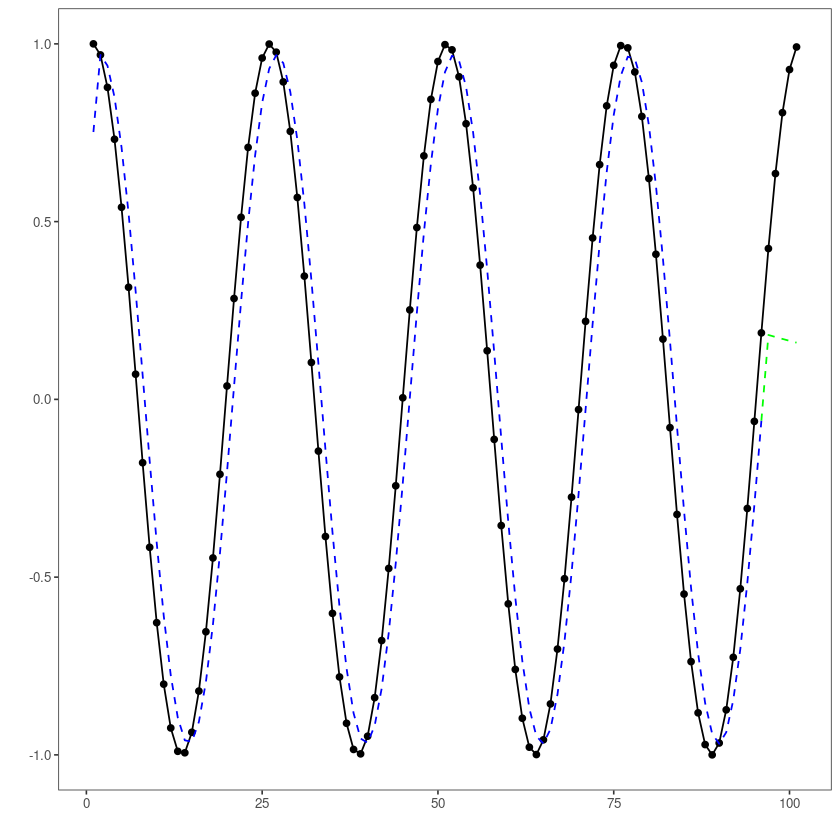

In [5]:
plot_ts_pred(y=yvalues, yadj=adjust, ypre=prediction)